<a href="https://colab.research.google.com/github/satrakidol/Machine-Learning-Indian-Liver-Patient/blob/main/Copy_of_Machine_Learning_Indian_Liver_Patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Μέρος 3: Εφαρμογή σε άλλο σύνολο δεδομένων πίνακα

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msng
import seaborn as sns
import numpy as np
import tensorflow as tf

In [ ]:
# read dataset
Liver = pd.read_csv("/content/Indian Liver Patient Dataset (ILPD).csv")

In [ ]:
Liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [ ]:
Liver.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
#checking if the last column is the one specifying if someone is liver patient or not
counter = 1

for i in Liver["1"]:
  if i == 1:
    counter = counter+1

print(counter)

416


Based on the total number of 1, I believe that 1 means liver patient in that df

Reading CSV without header

In [ ]:
Liver = pd.read_csv("/content/Indian Liver Patient Dataset (ILPD).csv", header=None)

In [ ]:
Liver.describe()

,0,2,3,4,5,6,7,8,9,10
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
Liver.shape

(583, 11)

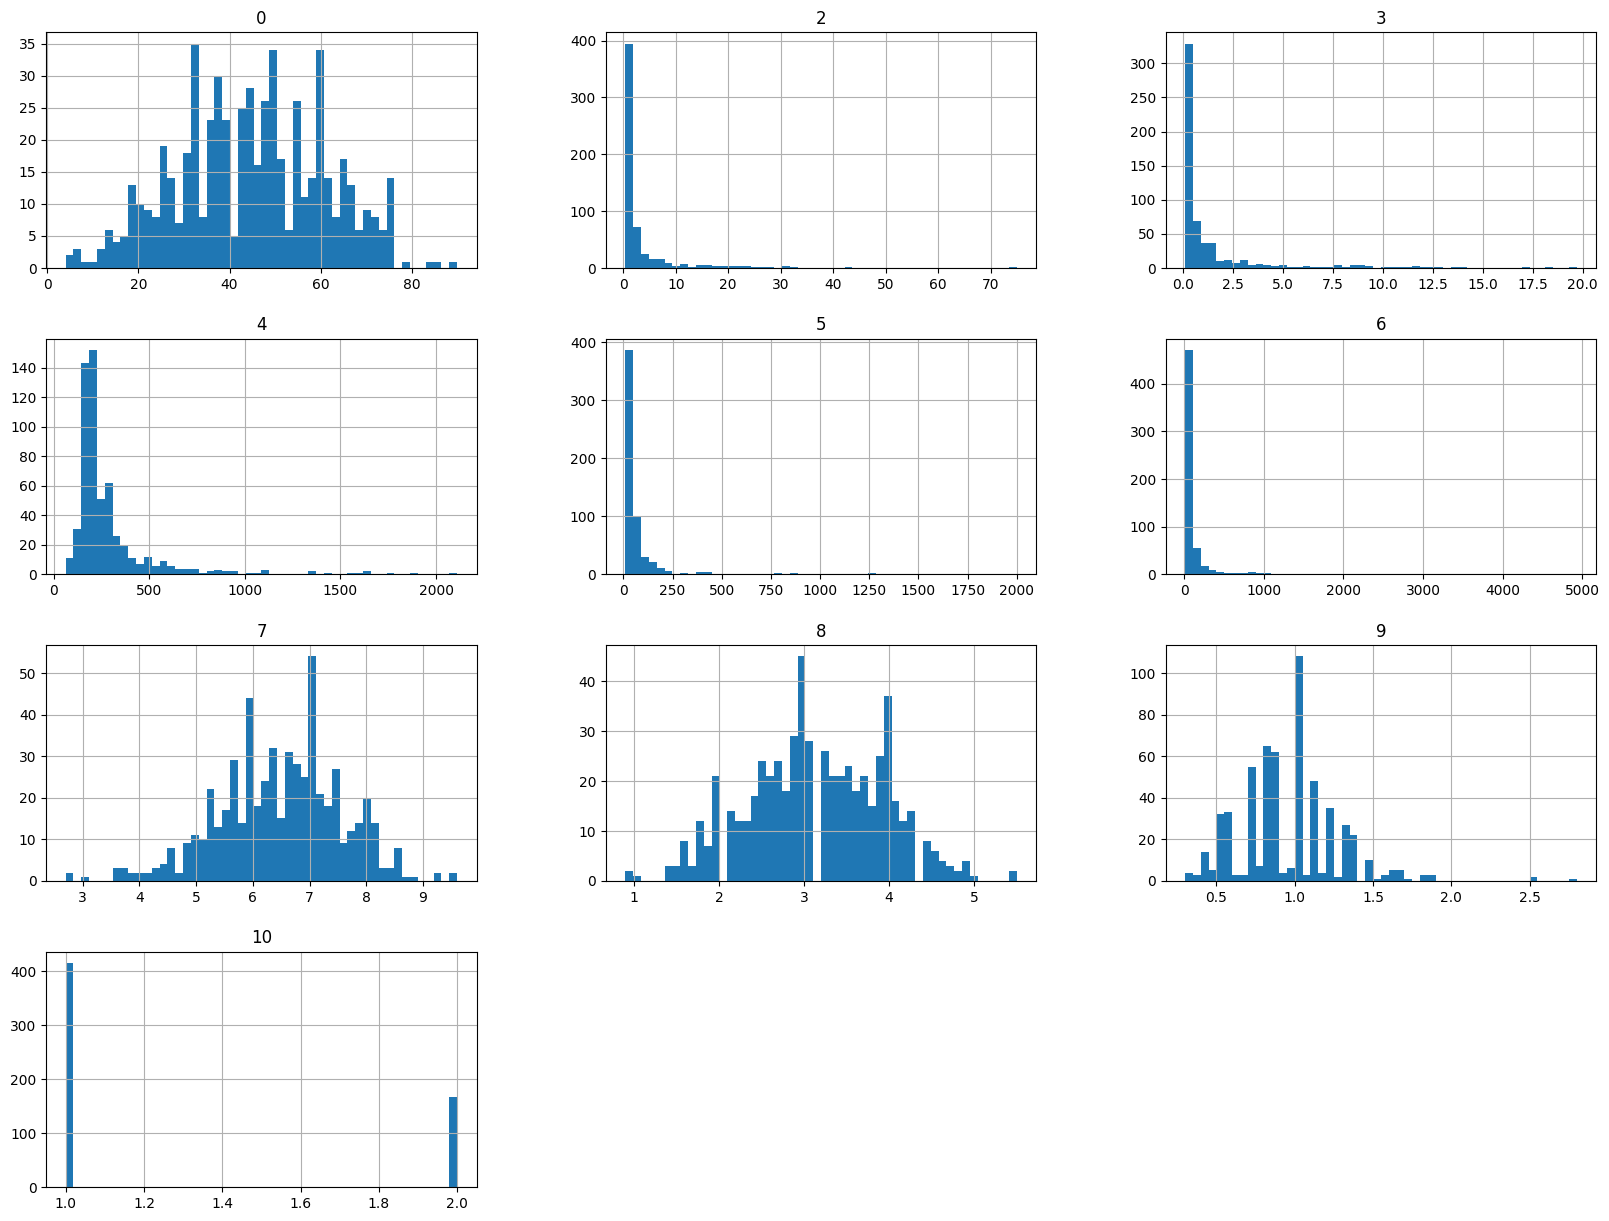

In [ ]:
#creating graphs
Liver.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
#checking for missing values
Liver.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     4
10    0
dtype: int64

<Axes: >

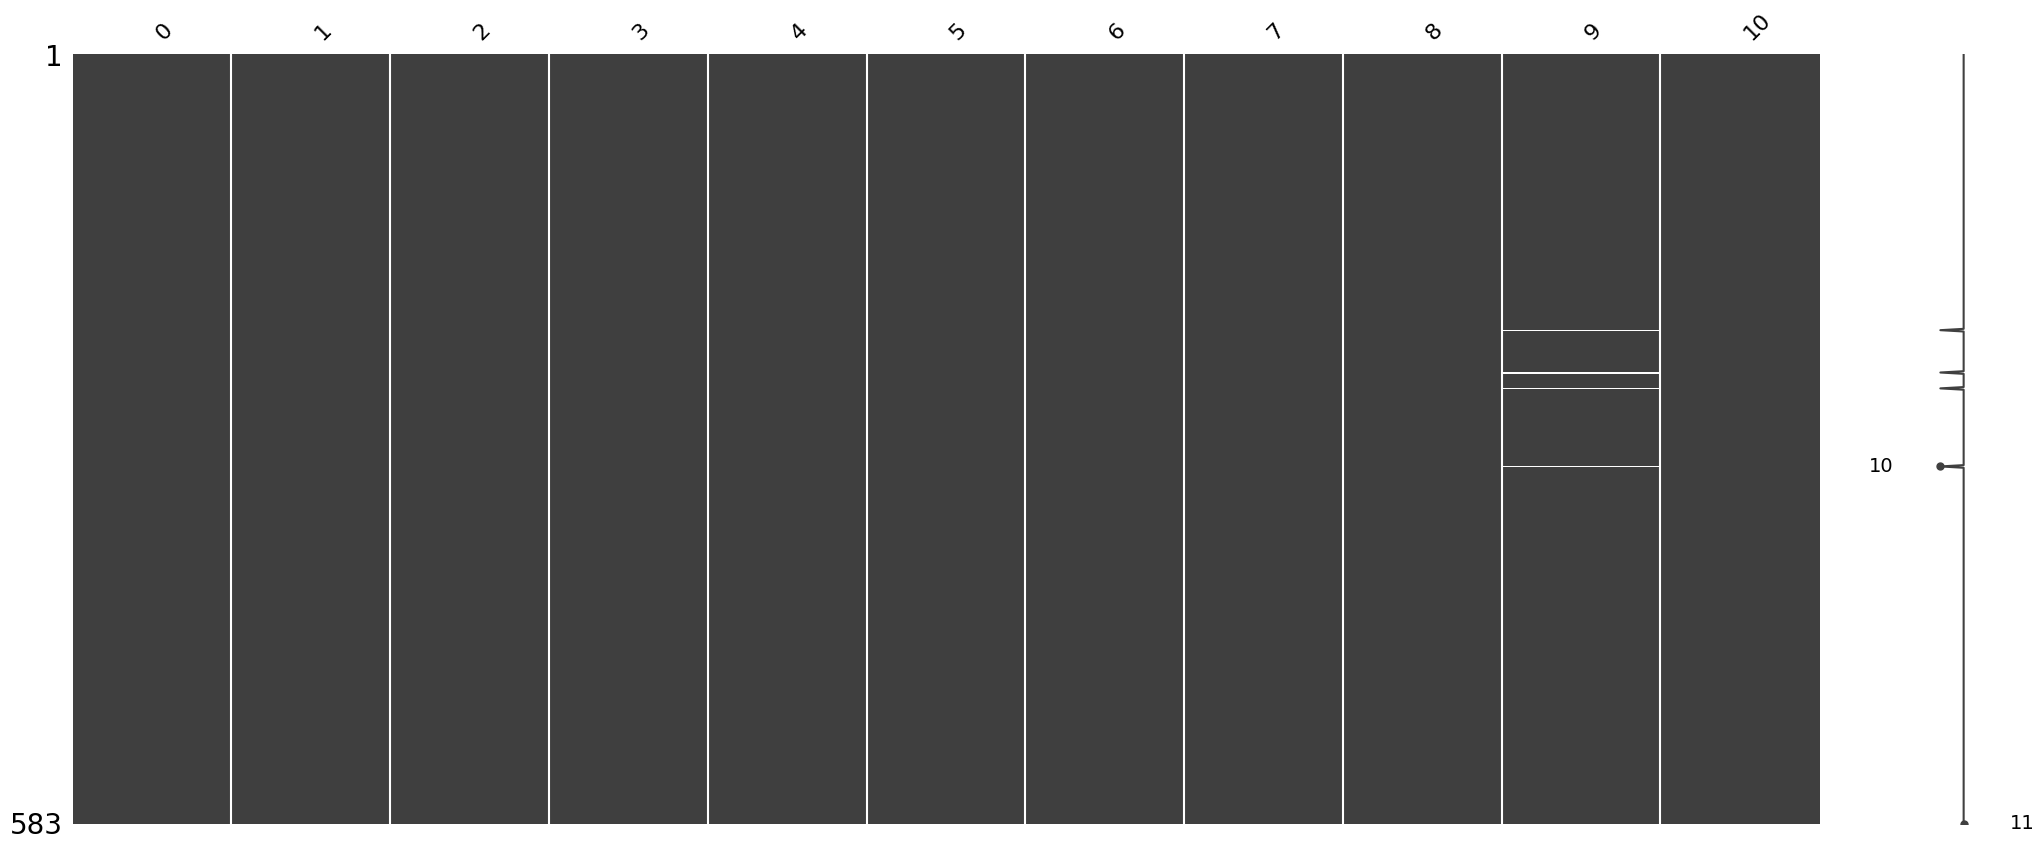

In [ ]:
msng.matrix(Liver)

In [ ]:
print(Liver[9])

0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: 9, Length: 583, dtype: float64


In [ ]:
#fullfiling missing data
Liver[9]=Liver[9].replace(np.nan, Liver[9].median())

In [ ]:
#cheching again the data
Liver.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

<Axes: >

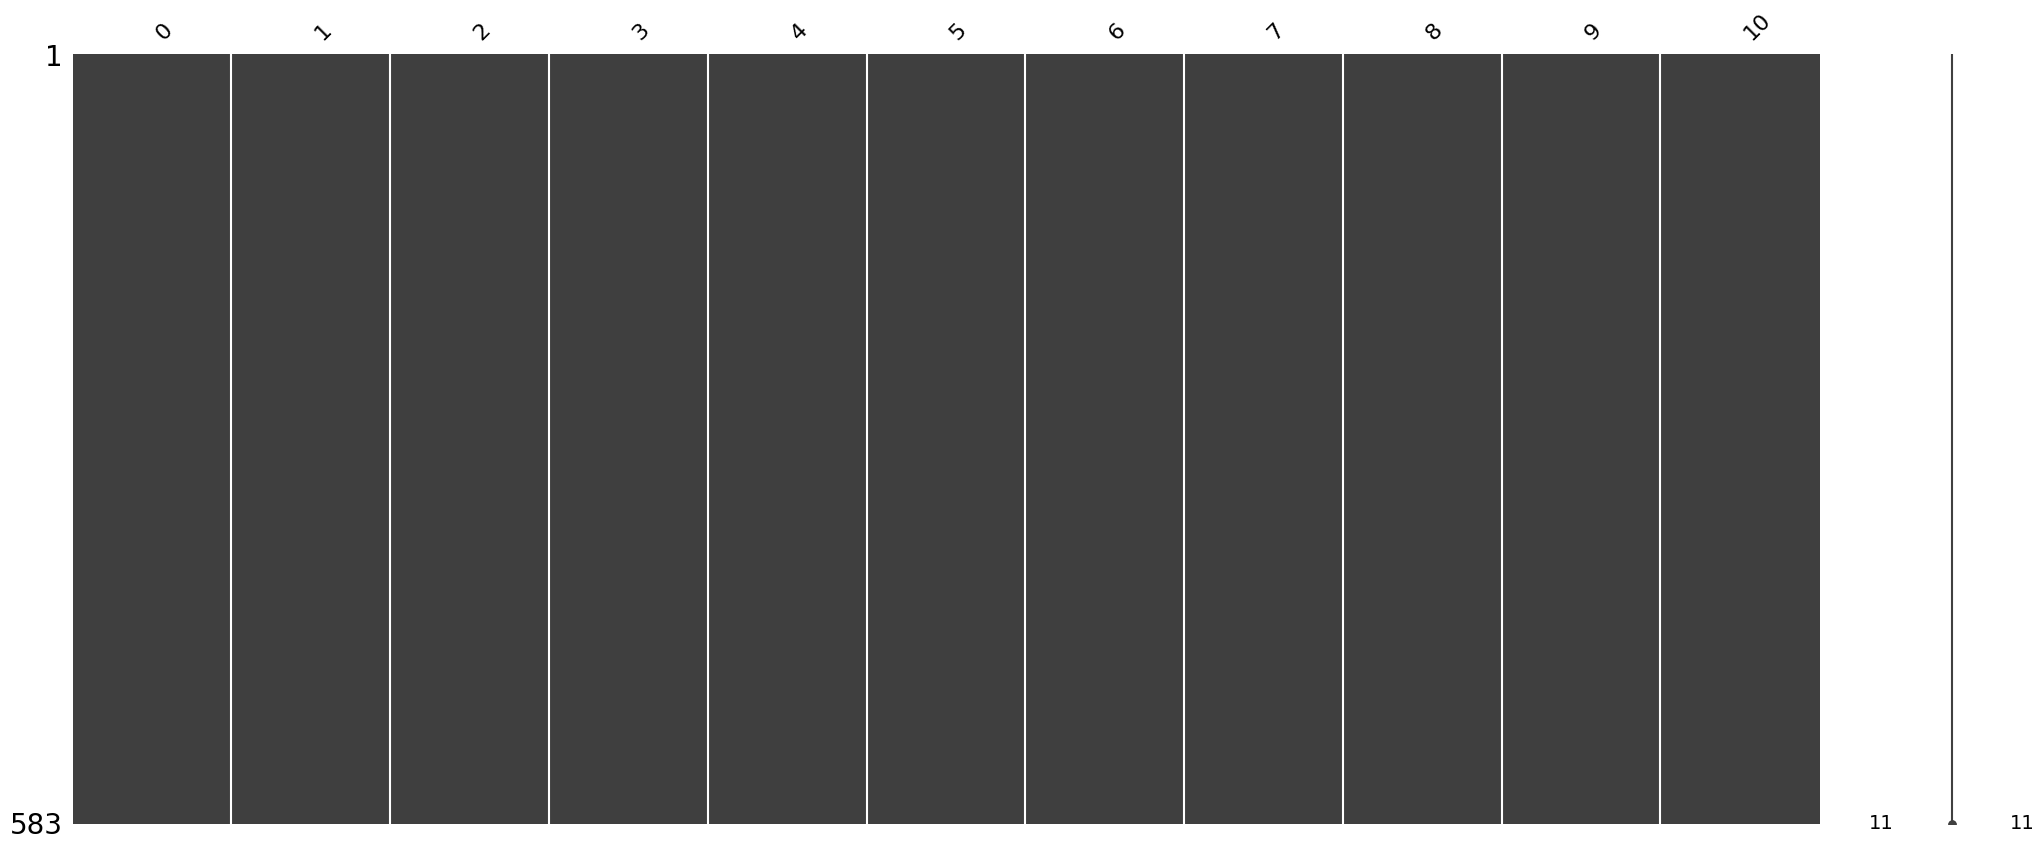

In [ ]:
msng.matrix(Liver)

In [ ]:
Liver.corr()

<ipython-input-65-a462ac4365c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Liver.corr()


,0,2,3,4,5,6,7,8,9,10
0,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
2,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
3,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
4,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
5,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
6,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
7,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
8,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
9,-0.215968,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144
10,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162144,1.000000


<ipython-input-66-9714b75b5c41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Liver.corr(), annot=True)


<Axes: >

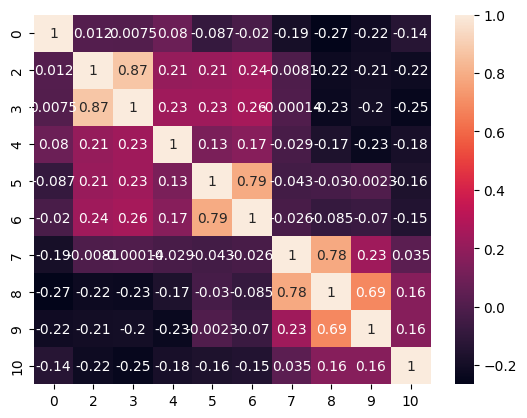

In [ ]:
sns.heatmap(Liver.corr(), annot=True)

Separating dataframe to dependent (y) and independent (x) variables

In [ ]:
print(Liver)

     0       1     2    3    4   5    6    7    8     9   10
0    65  Female   0.7  0.1  187  16   18  6.8  3.3  0.90   1
1    62    Male  10.9  5.5  699  64  100  7.5  3.2  0.74   1
2    62    Male   7.3  4.1  490  60   68  7.0  3.3  0.89   1
3    58    Male   1.0  0.4  182  14   20  6.8  3.4  1.00   1
4    72    Male   3.9  2.0  195  27   59  7.3  2.4  0.40   1
..   ..     ...   ...  ...  ...  ..  ...  ...  ...   ...  ..
578  60    Male   0.5  0.1  500  20   34  5.9  1.6  0.37   2
579  40    Male   0.6  0.1   98  35   31  6.0  3.2  1.10   1
580  52    Male   0.8  0.2  245  48   49  6.4  3.2  1.00   1
581  31    Male   1.3  0.5  184  29   32  6.8  3.4  1.00   1
582  38    Male   1.0  0.3  216  21   24  7.3  4.4  1.50   2

[583 rows x 11 columns]


Separating dataframe to dependent (y) and independent (x) variables

In [ ]:
y = Liver[10].values

In [ ]:
x = Liver

In [ ]:
x.drop(x.columns[-1], axis=1, inplace=True)

In [ ]:
print(y)

[1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2
 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 2 2 2
 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1
 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2
 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 1
 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1
 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1
 1 2 1 2 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2
 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 1 2
 1 1 2 1 1 1 1 2 2 1 2 1 

In [ ]:
print(x)

      0       1     2    3    4   5    6    7    8     9
0    65  Female   0.7  0.1  187  16   18  6.8  3.3  0.90
1    62    Male  10.9  5.5  699  64  100  7.5  3.2  0.74
2    62    Male   7.3  4.1  490  60   68  7.0  3.3  0.89
3    58    Male   1.0  0.4  182  14   20  6.8  3.4  1.00
4    72    Male   3.9  2.0  195  27   59  7.3  2.4  0.40
..   ..     ...   ...  ...  ...  ..  ...  ...  ...   ...
578  60    Male   0.5  0.1  500  20   34  5.9  1.6  0.37
579  40    Male   0.6  0.1   98  35   31  6.0  3.2  1.10
580  52    Male   0.8  0.2  245  48   49  6.4  3.2  1.00
581  31    Male   1.3  0.5  184  29   32  6.8  3.4  1.00
582  38    Male   1.0  0.3  216  21   24  7.3  4.4  1.50

[583 rows x 10 columns]


In [ ]:
print(x)

      0       1     2    3    4   5    6    7    8     9
0    65  Female   0.7  0.1  187  16   18  6.8  3.3  0.90
1    62    Male  10.9  5.5  699  64  100  7.5  3.2  0.74
2    62    Male   7.3  4.1  490  60   68  7.0  3.3  0.89
3    58    Male   1.0  0.4  182  14   20  6.8  3.4  1.00
4    72    Male   3.9  2.0  195  27   59  7.3  2.4  0.40
..   ..     ...   ...  ...  ...  ..  ...  ...  ...   ...
578  60    Male   0.5  0.1  500  20   34  5.9  1.6  0.37
579  40    Male   0.6  0.1   98  35   31  6.0  3.2  1.10
580  52    Male   0.8  0.2  245  48   49  6.4  3.2  1.00
581  31    Male   1.3  0.5  184  29   32  6.8  3.4  1.00
582  38    Male   1.0  0.3  216  21   24  7.3  4.4  1.50

[583 rows x 10 columns]


In [ ]:
#Dictionary
word2number = {'Male': 1, 'Female':2}

#converting sex to number
x[1] = x[1].replace(word2number)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.transform(x_test)

#Trying Logistic Regression

In [ ]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(penalty=None, max_iter=30000)

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=30000, penalty=None)

In [ ]:
y_hat_test = lr.predict(x_test)


print(y_hat_test)

print(lr.coef_)

[2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1
 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1]
[[-1.03585312e-02  1.40310209e-01 -6.61553375e-03 -3.11347201e-01
  -1.09878902e-03 -1.23836374e-02 -1.85189845e-03 -9.89080563e-01
   1.93008583e+00 -1.85640277e+00]]


In [ ]:
#calculating accuracy
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_hat_test)
absolute_error= metrics.mean_absolute_error(y_test, y_hat_test)

print('Accuracy = {}'.format(acc))
print('Absolute Error = {}'.format(absolute_error))

Accuracy = 0.7314285714285714
Absolute Error = 0.26857142857142857


Logistic Regression: Accuracy = 0.7314285714285714
Absolute Error = 0.26857142857142857

#Trying TensorFlow

In [ ]:
import keras
y_train_c = keras.utils.to_categorical(y_train, num_classes=10)
y_test_c = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# print(y_train_c)

In [ ]:
print(y_train)

[1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 1
 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 2 1
 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2
 2 1 2 1 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 2 1 2 1 2
 2 1 2 1 1 1 1 2 2 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 2 1 1 2 1 1
 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 1 1 2
 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1
 2 1 1 1 2 1 2 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 2 2 2 1 2 1
 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 2 2 1 2 2 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2
 1]


In [ ]:
Liver.shape

(583, 10)

In [ ]:
x_train.shape

(408, 10)

In [ ]:
from tensorflow import keras
from keras import layers

num_classes = 10

model = keras.Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(20, activation='relu',),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
Total params: 1,270
Trainable params: 1,270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#from keras.optimizers import SGD

In [ ]:
#model.compile( optimizer='SGD', loss='mean_squared_error', metrics=["accuracy"])

In [ ]:
model.compile( optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
model.fit(x_train, y_train_c, epochs=20, batch_size=32)

Epoch 1/20
13/13 [==============================] - 1s 2ms/step - loss: 88.1252 - accuracy: 0.0074 
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 47.1343 - accuracy: 0.1103
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 23.6242 - accuracy: 0.0882
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 8.6123 - accuracy: 0.0931
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 1.5246 - accuracy: 0.6103
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 1.1181 - accuracy: 0.6936
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.7923 - accuracy: 0.6054
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.6716
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.6422
Epoch 10/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6789
Epoch 11/20
13/

In [ ]:
model.fit(x_train, y_train_c, epochs=20, batch_size=32)

Epoch 1/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7083
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7255
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7010
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7059
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7230
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.7108
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7230
Epoch 8/20
13/13 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7157
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.7230
Epoch 10/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.6912
Epoch 11/20
13/13 [

In [ ]:
###### EVALUATE MODEL HERE ( .evaluate() ) ######

score = model.evaluate(x_test, y_test_c, verbose = 'auto')

print("Test loss:", score[0])
print("Test accuracy:", score[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.6971
Test loss: 0.5307914614677429
Test accuracy: 0.6971428394317627
